# Lag Compensators

# From last lecture

Lead Compensator
$$
K(s) = K_{ld}\frac{s+b}{s+a}, \hspace{1cm} b<a
$$

Lag Compensator
$$
K(s) = K_{lg}\frac{s+b}{s+a}, \hspace{1cm} b>a
$$


In [9]:
import control as ct

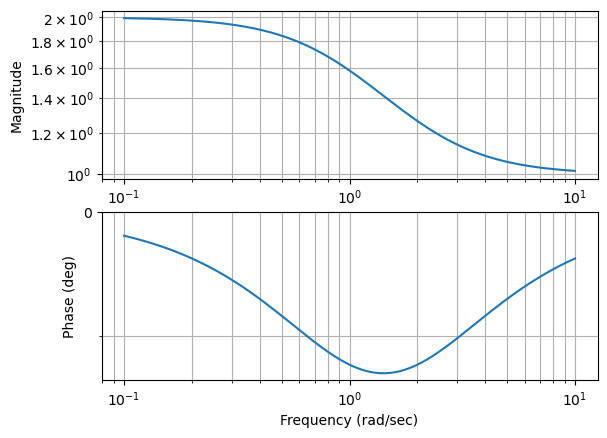

In [2]:
K = ct.tf([1, 2], [1, 1])
mag, phase, w = ct.bode_plot(K)

# When do we use Lead and Lag Controllers?

When PID (or other current simple controller) is not quite good enough. 

Lead and Lag compensators are usually added in-line with another simple controller.

![closedloop](closedloop.png "Closed Loop")

General philosophy: start simple, then gradually increase complexity if needed.

Lead controller:
- speed up system (how?)
- increase robustness (how?)


Lag controller:
- slow down system
- improve reference tracking
- improve disturbance rejection
- keep transient response the same, but reduce steady state error

# Lag Compensators - Design using Root Locus 

This method highlights how to keep transient response the same, but reduce steady state error.

# Steady State Error

Want to understand the effect of a Lag Compensator on steady state error.

Consider a plant 
$$
P(s) = \frac{B(s)}{A(s)} = \frac{b_0 + b_1s + \cdots b_{n_b}s^{n_b}}{1 + a_1s + \cdots a_{n_a}s^{n_a}}
$$ 
and a Lag Compensator $K(s) = K_{lg} \frac{s+b}{s+a}$.

The steady state error to a unit step is:
$$
\begin{align*}
\epsilon(\infty) &= \lim_{s \to 0} \mathcal{E}(s)s \\
&= \lim_{s \to 0} sS(s)R(s) \\
&= \lim_{s \to 0} \frac{1}{1 + P(s)K(s)}sR(s) \\
&= \lim_{s \to 0} \frac{1}{1 + \frac{B(s)}{A(s)}K_{lg}\frac{s+b}{s+a}}sR(s) \\
&= \lim_{s \to 0} \frac{A(s)(s+a)}{B(s)K_{lg}(s+b) + A(s)(s+a)}sR(s) \\
&= \lim_{s \to 0} \frac{(1 + a_1s + \cdots a_{n_a}s^{n_a})(s+a)}{(b_0 + b_1s + \cdots b_{n_b}s^{n_b})K_{lg}(s+b) + (1 + a_1s + \cdots a_{n_a}s^{n_a})(s+a)}s\frac{1}{s} \\
&= \frac{a}{b_0K_{lg}b + a} \\
\end{align*}
$$
Recall that for a Lag compensator $b>a$. Therefore, we can reduce the steady state error using a Lag Compensator. 

Note, however, that we cannot eliminate steady state error using a Lag Compensator.

# In Class Activity!

Consider a plant $P(s) = \frac{s+1}{s^2+2s+2}$. What is the steady state error for a proportional controller? Can we select $a$ and $b$ to reduce the steady state error by a factor of 10?

The steady state error for a closed loop system with a proportional controller is equal to:
$$
\begin{align*}
\varepsilon(\infty) &= \lim_{s \to 0} \frac{1}{1 + P(s)K(s)}sR(s) \\
&= \lim_{s \to 0} \frac{1}{1 + \frac{s+1}{s^2+2s+2}K} \\
&= \lim_{s \to 0} \frac{s^2+2s+2}{s^2+2s+2 + (s+1)K} \\
&= \frac{2}{2+K}
\end{align*}
$$
From the derivation above, the steady state error for a closed-loop system with a Lag Compensator is equal to:
$$
\begin{align*}
\varepsilon_c(\infty) = \frac{a}{2Kb + a} \\
\end{align*}
$$
We want the ratio of $\varepsilon_c(\infty)/\varepsilon(\infty)$ to be equal to $0.1$:
$$
\begin{align*}
\frac{\varepsilon_c(\infty)}{\varepsilon(\infty)} &= \frac{\frac{a}{2Kb + a}}{\frac{2}{2+K}} \\
0.1 &= \frac{a(2+K)}{2(2Kb+a)} \\
0.1*2(2Kb+a) &= a(2+K) \\
(0.4K)b &= a(1.8+K) \\
\frac{b}{a} &= \frac{(1.8+K)}{0.4K}
\end{align*}
$$
Thus if we select $b$ and $a$ such that this ratio holds, we will reduce the steady state error by a factor of 10.

# Designing a Lag Compensator - The Root Locus Approach

We have determined a ratio that $a$ and $b$ must satisfy in order to get the desired steady state error. 

Now we must place the compensator pole and zero in the s-plane. 

The main objective is to not change the transient response characteristics (such as rise time, overshoot, etc.) that much. 

So we want to keep the Root Locus plot very similar when we add the Lag Compensator.

# Key Reasoning

Consider a point $a$ in the s-plane:
- Recall that every point on the Root Locus satisfies the Angle Condition and the Magnitude Condition. That is, if and only if a point $L(a)$ has angle $-180$ and magnitude $1$ then it lies on the Root Locus.
- Each pole and zero "contributes" an angle to the point $a$
- The angle contributed by a zero is $\theta_z$ where $a-z = M_z \angle \theta_z$.
- Thus, if we do not want the Lag compensator to change the Root Locus very much, we need to place the pole and zero of the Root Locus close together.
- In order to place the pole and the zero close together, but also have the correct ratio to reduce the steady state error to the desired level, it is typical to choose $a$ and $b$ quite small. 

# Example

The main reasoning will be illustrated using an example.

Consider a loop transfer function $K(s)P(s) = \frac{s+4}{s^2+4s+8}$. We want to reduce the steady state error to a unit step function by a factor of 10, without changing the transient response characteristics too much. 

In [10]:
import numpy as np
import math
import control as ct
import matplotlib.pyplot as plt

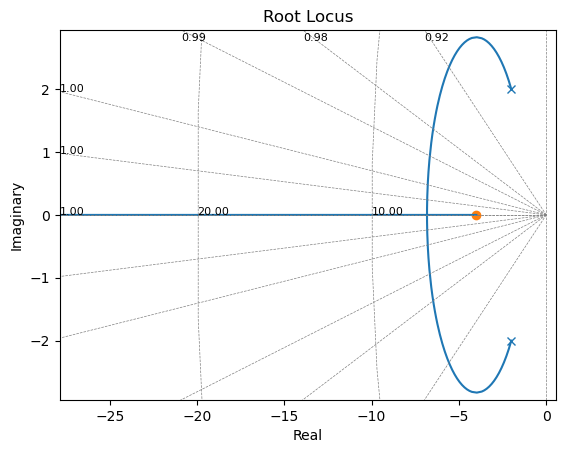

In [11]:
L = ct.tf([1, 4], [1, 4, 8])

cl_poles_P, gain_P = ct.root_locus(L)


Text(0.5, 0, 'Time (s)')

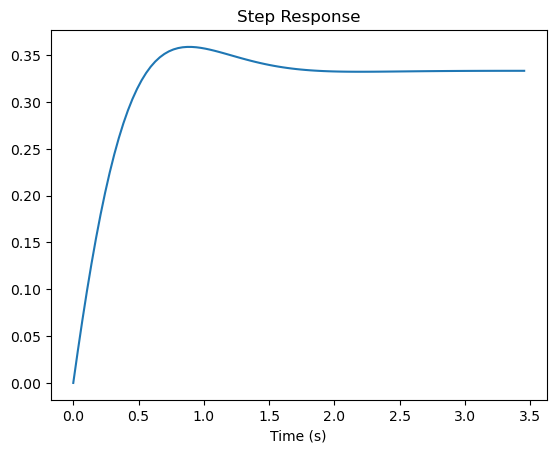

In [12]:
T  = L/(1+L)
t,y = ct.step_response(T)
fig,ax = plt.subplots(1)
ax.plot(t,y)
ax.set_title('Step Response')
ax.set_xlabel('Time (s)')

# Calculate Steady State Error

The input is a unit step. 

$$
\begin{align*}
\varepsilon(\infty) &= \lim_{s \to 0} s \mathcal{E}(s) \\
&= \lim_{s \to 0} sS(s)R(s) \\
&= \lim_{s \to 0} \frac{s}{1 + L(s)}R(s) \\
&= \lim_{s \to 0} \frac{s}{1 + \frac{s+4}{s^2 + 4s + 8}}\frac{1}{s} \\
&= \lim_{s \to 0} \frac{1}{1 + \frac{s+4}{s^2 + 4s + 8}} \\
&= \frac{1}{1 + \frac{4}{8}} \\
&= \frac{8}{12}
\end{align*}
$$



# Now calculate steady state error for compensated system

Let $K(s) = \frac{s+b}{s+a}$.

Then the compensated loop transfer function is $L_c(s) = K(s)L(s)$. And the compensated steady state error will be:

$$
\begin{align*}
\varepsilon_c(\infty) &= \lim_{s \to \infty} s \mathcal{E}_c(s) \\
&= \lim_{s \to \infty} s \frac{1}{1+L_c(s)} R(s) \\
&= \lim_{s \to 0} \frac{s}{1 + \frac{s+b}{s+a}\frac{s+4}{s^2 + 4s + 8}}\frac{1}{s} \\
&= \lim_{s \to 0} \frac{1}{1 + \frac{s+b}{s+a}\frac{s+4}{s^2 + 4s + 8}} \\
&= \frac{1}{1 + \frac{b}{a}\frac{4}{8}} \\
&= \frac{8a}{8a + 4b}
\end{align*}
$$

We want $\varepsilon_c(\infty) = 0.1\varepsilon(\infty)$. 

Plugging the expressions for $\varepsilon_c(\infty)$ and $\varepsilon(\infty)$ into this equality we get:
$$
\begin{align*}
\varepsilon_c(\infty) &= 0.1\varepsilon(\infty) \\
\frac{8a}{8a + 4b} &= 0.1 \frac{8}{12} \\
120a &= 8a + 4b \\
112a &= 4b \\
\frac{a}{b} &= 0.357
\end{align*}
$$

Conclude: $a$ and $b$ (the pole and zero of the lag compensator) must satisfy this ratio in order to decrease the steady state error by a factor of 10. 

# Choosing the pole and zero of the Lag Compensator

Recall that we don't want to change the transient response too much. 

Observation: placing poles and zeros very close together will not change the Root Locus very much, because you are adding and removing about the same amount of phase. 

If we choose $b=0.5$, then $a=0.0164$


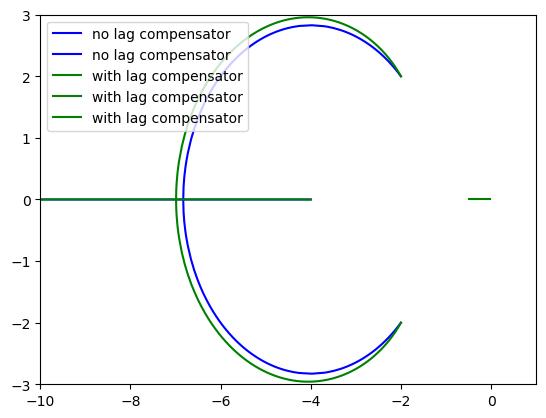

In [19]:
P = ct.tf([1, 4], [1, 4, 8])

K = ct.tf([1, 0.5], [1, 0.0164])

cl_poles_P, gain_P = ct.root_locus(P, plot=False)
cl_poles_L, gain_L = ct.root_locus(P*K, plot=False)

fig,ax = plt.subplots(1)
ax.plot(np.real(cl_poles_P), np.imag(cl_poles_P), color='b', label='no lag compensator')
ax.plot(np.real(cl_poles_L), np.imag(cl_poles_L), color='g', label='with lag compensator')
ax.set_xlim(-10,1)
ax.set_ylim(-3,3)
ax.legend()

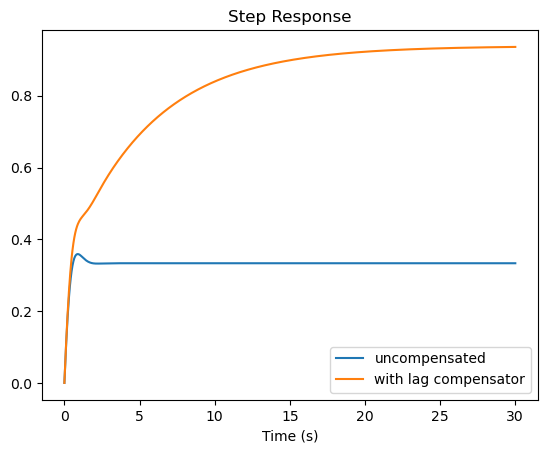

In [20]:
T0 = P/(1+P)
T = P*K/(1+P*K)
t = np.linspace(0,30,1000)
t0,y0 = ct.step_response(T0,T=t)
t,y = ct.step_response(T,T=t)


fig, ax = plt.subplots(1)
ax.plot(t0,y0,label='uncompensated')
ax.plot(t,y,label='with lag compensator')
ax.set_title('Step Response')
ax.set_xlabel('Time (s)')
ax.legend()


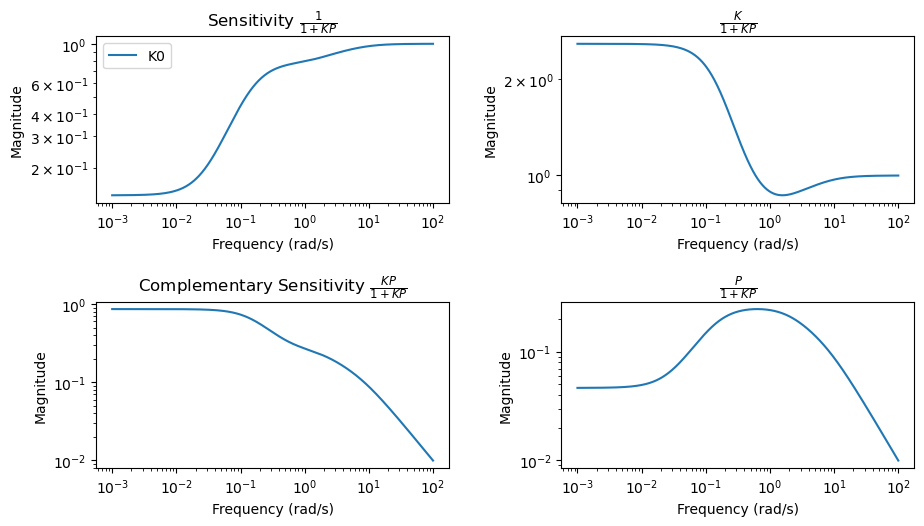

In [21]:
def plot_gang_of_four(P,K):
    num_sys = len(K)
    fig, ax = plt.subplots(2,2, figsize=(10,6))
    fig.tight_layout(pad=5.0)

    for ii in range(num_sys):
        T = P*K[ii]/(1+P*K[ii])
        S = 1/(1+P*K[ii])
        SK = K[ii]*S 
        SP = P*S 

        mag_S, phase_S, w_S = ct.bode_plot(S,plot=False)
        mag_T, phase_T, w_T = ct.bode_plot(T,plot=False)
        mag_SK, phase_SK, w_SK = ct.bode_plot(SK,plot=False)
        mag_SP, phase_SP, w_SP = ct.bode_plot(SP,plot=False)

        label_str = 'K' + str(ii)
        ax[0,0].loglog(w_S,mag_S, label=label_str)
        ax[0,0].set_title(r'Sensitivity $\frac{1}{1+KP}$')
        ax[0,0].legend()
        ax[0,0].set_xlabel('Frequency (rad/s)')
        ax[0,0].set_ylabel('Magnitude')
       
        ax[1,0].loglog(w_T,mag_T)
        ax[1,0].set_title(r'Complementary Sensitivity $\frac{KP}{1+KP}$')
        ax[1,0].set_xlabel('Frequency (rad/s)')
        ax[1,0].set_ylabel('Magnitude')

        ax[0,1].loglog(w_SK,mag_SK)
        ax[0,1].set_title(r'$\frac{K}{1+KP}$')
        ax[0,1].set_xlabel('Frequency (rad/s)')
        ax[0,1].set_ylabel('Magnitude')

        ax[1,1].loglog(w_SP,mag_SP)
        ax[1,1].set_title(r'$\frac{P}{1+KP}$')
        ax[1,1].set_xlabel('Frequency (rad/s)')
        ax[1,1].set_ylabel('Magnitude')

    return fig, ax

P = ct.tf([1, 4], [1, 8, 12])
K1 = ct.tf([1, 0.5], [1, 0.027])
#K2 = ct.tf([1, 0.5], [1, 0])
fig, ax = plot_gang_of_four(P,[K1])

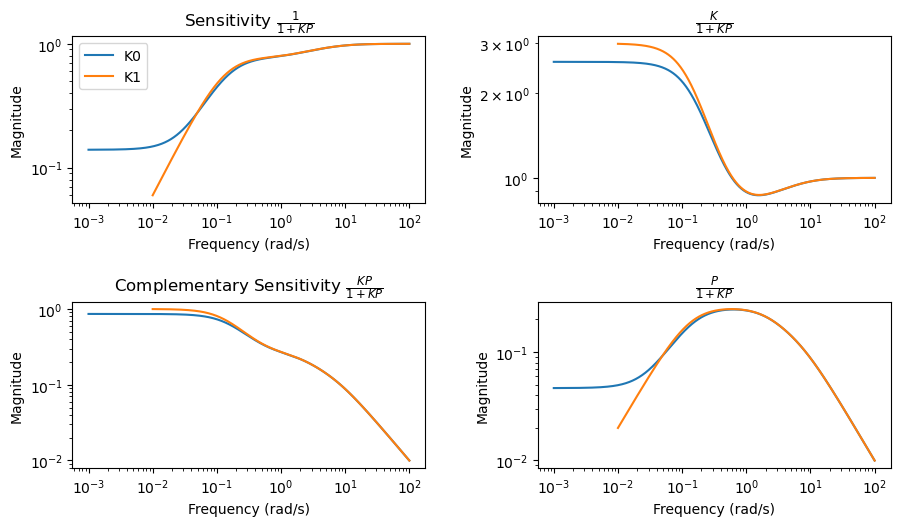

In [23]:
P = ct.tf([1, 4], [1, 8, 12])
K1 = ct.tf([1, 0.5], [1, 0.027])
K2 = ct.tf([1, 0.5], [1, 0])
fig, ax = plot_gang_of_four(P,[K1, K2])